In [1]:
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadalimalik","key":"2cd6da4fcdd468d7bc62f618433035dd"}'}

In [2]:
!mkdir -p ~/.kaggle 

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json 

In [5]:
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 15.7MB/s]


In [6]:
!ls


car-price-prediction.zip  drive  kaggle.json  sample_data


In [7]:
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [8]:
!ls

 CarPrice_Assignment.csv   'Data Dictionary - carprices.xlsx'   kaggle.json
 car-price-prediction.zip   drive			        sample_data


In [50]:
import pandas as pd
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
# show the boolean dataframe             
print(" \nshow the boolean Dataframe : \n\n", data.isnull()) 
  
# Count total NaN in a DataFrame 
print(" \nCount total NaN in a DataFrame : \n\n", 
       data.isnull().sum().sum()) 

 
show the boolean Dataframe : 

      car_ID  symboling  CarName  fueltype  ...  peakrpm  citympg  highwaympg  price
0     False      False    False     False  ...    False    False       False  False
1     False      False    False     False  ...    False    False       False  False
2     False      False    False     False  ...    False    False       False  False
3     False      False    False     False  ...    False    False       False  False
4     False      False    False     False  ...    False    False       False  False
..      ...        ...      ...       ...  ...      ...      ...         ...    ...
200   False      False    False     False  ...    False    False       False  False
201   False      False    False     False  ...    False    False       False  False
202   False      False    False     False  ...    False    False       False  False
203   False      False    False     False  ...    False    False       False  False
204   False      False    False     False 

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

In [13]:
print(tf.__version__)

2.4.1


In [53]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
print(data.shape)

(205, 26)


In [55]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['CarName'] = labelencoder.fit_transform(data['CarName'])
data['enginetype'] = labelencoder.fit_transform(data['enginetype'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [57]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [70]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,0,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,4,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,0,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,5,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,0,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,9,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,0,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,5,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,0,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,7,1,0,4,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,0,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,6,1,1,4,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,0,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,8,1,1,2,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,0,3.13,3.40,7.0,160,5500,16,22,17859.167


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [71]:
X=data.iloc[:,0:25]
y=data.iloc[:,-1]

In [72]:
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,0,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,0,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,0,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,0,3.19,3.40,8.0,115,5500,18,22


In [61]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [94]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(123, 25) (82, 25) (123,) (82,)


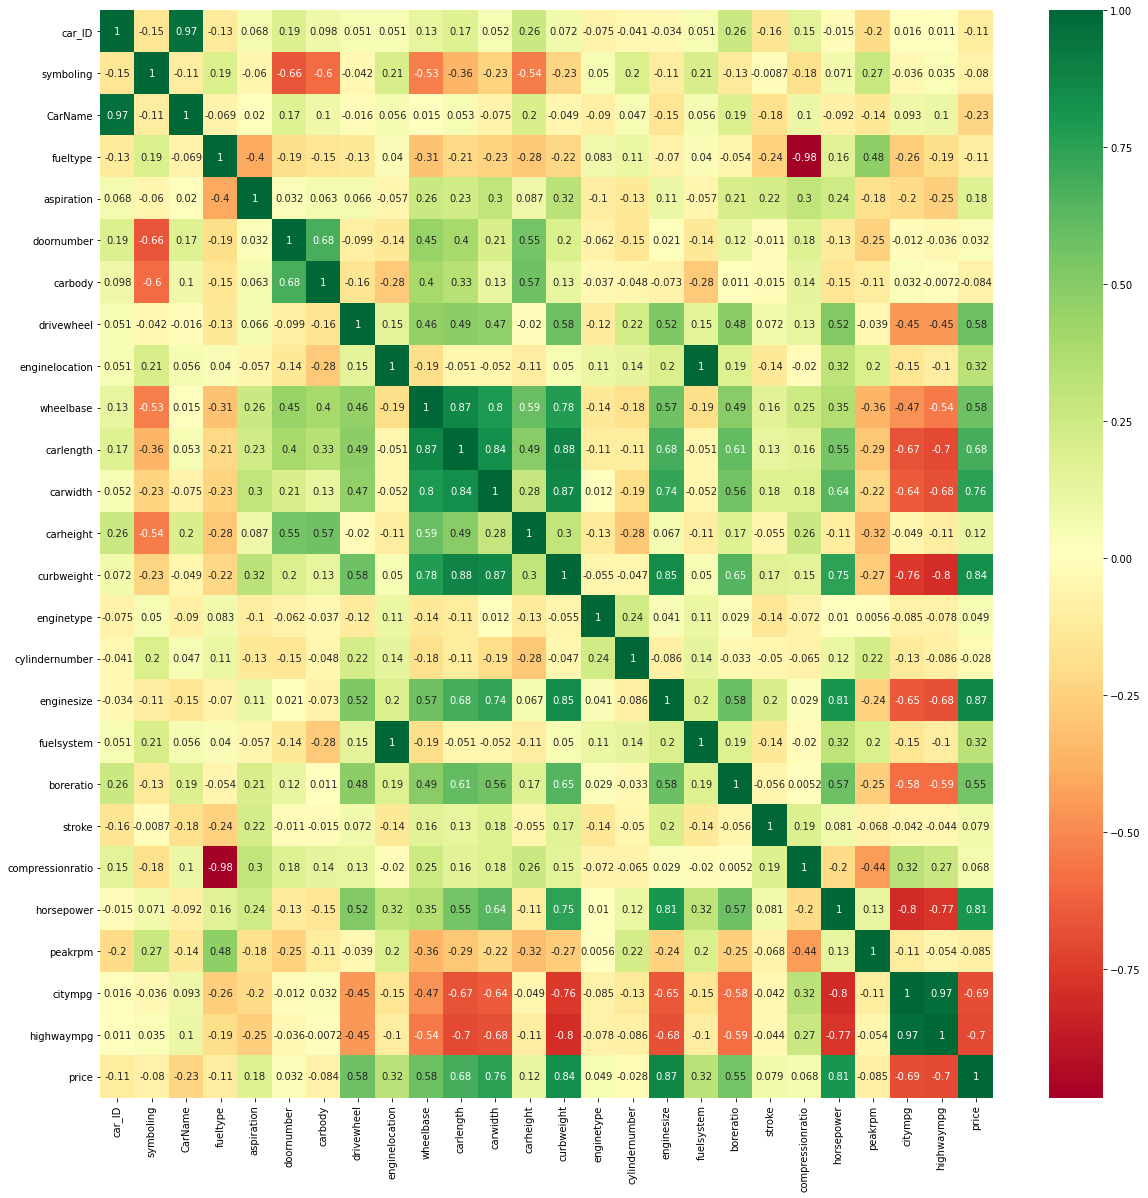

In [74]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [75]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [76]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

10

In [77]:
corr_features

{'CarName',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'highwaympg',
 'horsepower'}

In [95]:
X_train = X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [97]:
X_test

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,boreratio,stroke,peakrpm
15,16,0,1,0,4,3,2,0,103.5,55.7,3,3,3.62,3.39,5400
9,10,0,1,1,2,2,0,0,99.5,52.0,3,1,3.13,3.40,5500
100,101,0,1,0,4,3,1,0,97.2,54.7,3,2,3.33,3.47,5200
132,133,3,1,0,2,2,1,0,99.1,56.1,3,2,3.54,3.07,5250
68,69,-1,0,1,4,4,2,0,110.0,58.7,3,1,3.58,3.64,4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,125,3,1,1,2,2,2,0,95.9,50.2,3,2,3.59,3.86,5000
78,79,2,1,0,2,2,1,0,93.7,50.8,3,2,2.97,3.23,5500
119,120,1,1,1,2,2,1,0,93.7,50.8,3,2,3.03,3.39,5500
26,27,1,1,0,4,3,1,0,93.7,50.6,3,2,2.97,3.23,5500


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# mean = x_train.mean(axis=0)
# x_train -= mean

# std = x_train.std(axis=0)

# x_train /= std
# x_test -= mean
# x_test /= std

In [ ]:
# mean

In [ ]:
# std

In [ ]:
# np.mean(x_train, axis=0)

In [98]:
input_shape=(X_train.shape[1],)
input_shape

(15,)

In [106]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [107]:
model = build_model()
model.fit(X_train,y_train,validation_split=0.33,epochs=100,batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 217333536.0000 - mae: 12599.0811


In [102]:
# predicting the test set results
y_pred = model.predict(X_test)

In [85]:
y_pred[:5].astype('int64')

array([[13509],
       [13737],
       [13000],
       [13121],
       [10922]])

In [86]:
y_test[:5]

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
Name: price, dtype: float64

In [ ]:
# for i in range(k):
# print('processing fold #', i)
# val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
# val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
# partial_train_data = np.concatenate(
# [train_data[:i * num_val_samples],
# train_data[(i + 1) * num_val_samples:]],
# axis=0)
# partial_train_targets = np.concatenate(
# [train_targets[:i * num_val_samples],
# train_targets[(i + 1) * num_val_samples:]],
# axis=0)
# model = build_model()
# model.fit(partial_train_data, partial_train_targets,
# epochs=num_epochs, batch_size=1, verbose=0)
# val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
# all_scores.append(val_mae

In [ ]:
# import numpy as np
# k=4
# num_val_samples = len(x_train) // k
# num_epochs = 100
# all_scores = []

# num_epochs = 500
# all_mae_histories = []
# for i in range(k):
#     print('processing fold #', i)
#     val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
#     partial_train_data = np.concatenate(
#         [x_train[:i * num_val_samples],
#          x_train[(i + 1) * num_val_samples:]],
#         axis=0)
    
#     partial_train_targets = np.concatenate(
#         [y_train[:i * num_val_samples],
#          y_train[(i + 1) * num_val_samples:]],
#         axis=0)
    
# model = build_model()
# history = model.fit(partial_train_data, partial_train_targets,
#                     validation_data=(val_data, val_targets),
#                     epochs=num_epochs, batch_size=1, verbose=0)
# mae_history = history.history['val_mae']
# all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
# history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
# average_mae_history = [
# np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

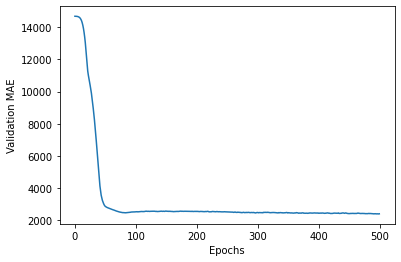

In [ ]:

# import matplotlib.pyplot as plt
# plt.plot(average_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

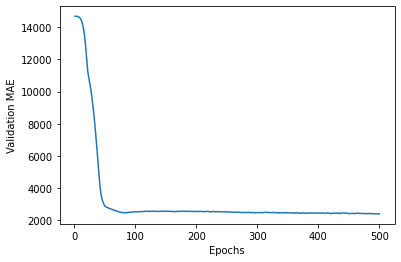

In [ ]:

# import matplotlib.pyplot as plt
# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

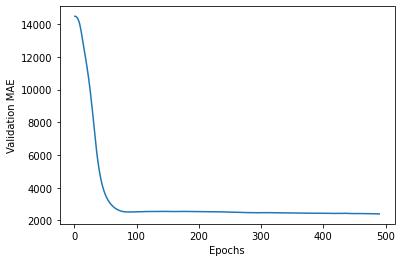

In [ ]:
# def smooth_curve(points, factor=0.9):
#     smoothed_points = []
#     for point in points:
#         if smoothed_points:
#             previous = smoothed_points[-1]
#             smoothed_points.append(previous * factor + point * (1 - factor))
#         else:
#             smoothed_points.append(point)
#     return smoothed_points
    
# smooth_mae_history = smooth_curve(average_mae_history[10:])
# plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

In [ ]:
model = build_model()
model.fit(x_train, y_train,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 232691440.0000 - mae: 12812.4590


In [ ]:
# predicting the test set results
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_pred[:5].astype('int64')

array([[1687],
       [ 270],
       [ 153],
       [ 405],
       [1792]])

In [ ]:
y_test[:5]

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
